In [61]:
import numpy as np # numerical computing 
import pandas as pd # data analysis, working with DataFrames
import matplotlib.pyplot as plt # visualizations
import seaborn as sns # visulizations ++
import tensorflow as tf # our main library, deep learning modellign
from tensorflow import keras # keras library
from tensorflow.keras import layers # for creating layers

In [62]:
df = pd.read_csv("/content/spam.csv", encoding="latin-1") # reading data


In [63]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [64]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
df = df.rename(columns={'v1':'label', 'v2':'Text'})
df['label_in_num'] = df['label'].map({'ham':0,'spam':1})
df.head()

,label,Text,label_in_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


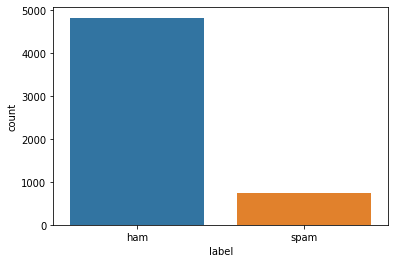

In [65]:
sns.countplot(x=df['label']) # countplot for label


In [66]:
df['label'].value_counts()


ham     4825
spam     747
Name: label, dtype: int64

# Imbalanced case:
data points with ham label are 6.5 times more than points with spam labels,

so this leads to a Imbalanced dataset.

Text(0.5, 0, 'Text length')

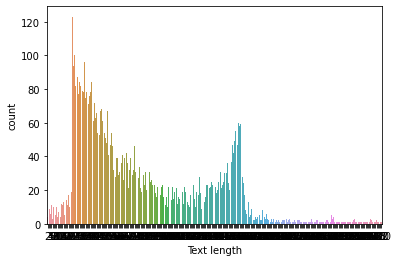

In [67]:
sns.countplot(x=[len(df.loc[i]['Text']) for i in range(len(df))])
plt.xlabel('Text length')

# We want these things:
## number of words in the whole dataset
## mean of word count in every row
## total words in dataset

In [68]:
text_words_lengths = [len(df.loc[i]['Text'].split()) for i in range(0, len(df))]
total_length = np.sum(text_words_lengths)
text_words_mean = int(np.mean(text_words_lengths))
print('we have ' + str(total_length) + ' words in our Dataframe')
print('the average word count in every scentence is ' + str(text_words_mean))
text_words_lengths[:5], total_length, text_words_mean

we have 86335 words in our Dataframe
the average word count in every scentence is 15


([20, 6, 28, 11, 13], 86335, 15)

In [69]:
from sklearn.model_selection import train_test_split

X, y = np.asanyarray(df['Text']), np.asanyarray(df['label_in_num'])
X = X.reshape(-1, 1)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline


In [71]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler 

print('Original dataset shape %s' % Counter(y))

ros = RandomOverSampler(random_state=42)
X_res, y_res = ros.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 4825, 1: 747})
Resampled dataset shape Counter({0: 4825, 1: 4825})


In [72]:
X_res.ravel()

array(['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...',
       'Ok lar... Joking wif u oni...',
       "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
       ...,
       '07732584351 - Rodger Burns - MSG = We tried to call you re your reply to our sms for a free nokia mobile + free camcorder. Please call now 08000930705 for delivery tomorrow',
       'PRIVATE! Your 2003 Account Statement for 07808247860 shows 800 un-redeemed S. I. M. points. Call 08719899229 Identifier Code: 40411 Expires 06/11/04',
       "Dear 0776xxxxxxx U've been invited to XCHAT. This is our final attempt to contact u! Txt CHAT to 86688 150p/MsgrcvdHG/Suite342/2Lands/Row/W1J6HL LDN 18yrs "],
      dtype=object)

In [73]:
y_res.shape

(9650,)

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=24)
len(X_train), len(X_test), X_train[:2], y_train[:2]

(7720,
 1930,
 array([['No. 1 Nokia Tone 4 ur mob every week! Just txt NOK to 87021. 1st Tone FREE ! so get txtin now and tell ur friends. 150p/tone. 16 reply HL 4info'],
        ['Never try alone to take the weight of a tear that comes out of ur heart and falls through ur eyes... Always remember a STUPID FRIEND is here to share... BSLVYL']],
       dtype=object),
 array([1, 0]))

# Model 1 Baseline Model - Random Forest 


In [75]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

tfidf_vec = TfidfVectorizer().fit(X_train.ravel())
X_train_vec, X_test_vec = tfidf_vec.transform(X_train.ravel()), tfidf_vec.transform(X_test.ravel())
baseline_model = RandomForestClassifier(n_estimators=250)
baseline_model.fit(X_train_vec, y_train)

random_forest_accuracy = accuracy_score(y_test, baseline_model.predict(X_test_vec))
print('Test:\n',classification_report(y_test, baseline_model.predict(X_test_vec)))
print('Train:\n',classification_report(y_train,baseline_model.predict(X_train_vec)))

Test:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       960
           1       1.00      1.00      1.00       970

    accuracy                           1.00      1930
   macro avg       1.00      1.00      1.00      1930
weighted avg       1.00      1.00      1.00      1930

Train:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3865
           1       1.00      1.00      1.00      3855

    accuracy                           1.00      7720
   macro avg       1.00      1.00      1.00      7720
weighted avg       1.00      1.00      1.00      7720



In [76]:
MAXTOKENS = total_length
OUTPUTLEN = text_words_mean

text_vec = layers.TextVectorization(
    max_tokens=MAXTOKENS,
    standardize='lower_and_strip_punctuation',
    output_mode='int',
    output_sequence_length=OUTPUTLEN
)

text_vec.adapt(X_train)

In [77]:
embedding_layer = layers.Embedding(
    input_dim=MAXTOKENS,
    output_dim=128,
    embeddings_initializer='uniform',
    input_length=OUTPUTLEN
)

#  Model 1 - Using our custom layers with 2 Dense layers¶


In [78]:
# Input layer
input_layer = layers.Input(shape=(1,), dtype=tf.string)
# Text Vectorizatino layer
vec_layer = text_vec(input_layer)
# Embedding layer
embedding_layer_model = embedding_layer(vec_layer)
# Global Average Pooling layer
x = layers.GlobalAveragePooling1D()(embedding_layer_model)
# Flatten layer for Dense layers
x = layers.Flatten()(x)
# 32 units dense layer
x = layers.Dense(32, activation='relu')(x)
# output layer with sigmoid activation function
output_layer = layers.Dense(1, activation='sigmoid')(x)
# final model
model_1 = keras.Model(input_layer, output_layer)

In [79]:
model_1.compile(optimizer=keras.optimizers.Adam(),
               loss=keras.losses.BinaryCrossentropy(label_smoothing=0.5),
               metrics=['accuracy'])


In [80]:
history_1 = model_1.fit(X_train,
           y_train,
           epochs=5,
           validation_data=(X_test, y_test),
           validation_steps=int(0.2 * len(X_test)))

Epoch 1/5
242/242 [==============================] - 4s 13ms/step - loss: 0.5954 - accuracy: 0.9392 - val_loss: 0.5694 - val_accuracy: 0.9912
Epoch 2/5
242/242 [==============================] - 3s 12ms/step - loss: 0.5658 - accuracy: 0.9965 - val_loss: 0.5658 - val_accuracy: 0.9948
Epoch 3/5
242/242 [==============================] - 3s 12ms/step - loss: 0.5635 - accuracy: 0.9992 - val_loss: 0.5647 - val_accuracy: 0.9984
Epoch 4/5
242/242 [==============================] - 3s 12ms/step - loss: 0.5629 - accuracy: 1.0000 - val_loss: 0.5645 - val_accuracy: 0.9984
Epoch 5/5
242/242 [==============================] - 3s 14ms/step - loss: 0.5627 - accuracy: 1.0000 - val_loss: 0.5642 - val_accuracy: 0.9990


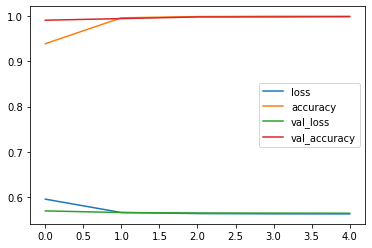

In [81]:
pd.DataFrame(history_1.history).plot()


## I want to compile, fit and evaluate for a few models, so I just creat method to easily reuse the code over and over.¶


In [82]:
def compile_model(model):
    '''
    simply compile the model with adam optimzer
    '''
    model.compile(optimizer=keras.optimizers.Adam(),
                 loss=keras.losses.BinaryCrossentropy(),
                 metrics=['accuracy'])    

def fit_model(model, epochs, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test):
    '''
    fit the model with given epochs, train and test data
    '''
    history = model.fit(X_train,
              y_train,
             epochs=epochs,
             validation_data=(X_test, y_test),
             validation_steps=int(0.2*len(X_test)))
    return history
 
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(model, X, y):
    '''
    evaluate the model and returns accuracy, precision, recall and f1-score 
    '''
    y_preds = np.round(model.predict(X))
    accuracy = accuracy_score(y, y_preds)
    precision = precision_score(y, y_preds)
    recall = recall_score(y, y_preds)
    f1 = f1_score(y, y_preds)
    
    model_results_dict = {'accuracy':accuracy,
                         'precision':precision,
                         'recall':recall,
                         'f1-score':f1}
    
    return model_results_dict

## Model 2 - Bidirectional LSTM¶


In [83]:
input_layer = layers.Input(shape=(1,), dtype=tf.string) # Input layer, string type(text)
vec_layer = text_vec(input_layer) # text vectorization layer(built previous lines)
embedding_layer_model = embedding_layer(vec_layer) # word embedding layer
bi_lstm = layers.Bidirectional(layers.LSTM(64, activation='tanh', return_sequences=True))(embedding_layer_model) # Bidirectional-LSTM, 64 units
lstm = layers.Bidirectional(layers.LSTM(64))(bi_lstm)
flatten = layers.Flatten()(lstm) # Flatten layer for enering in dense layers
dropout = layers.Dropout(.1)(flatten) # drop out layer
x = layers.Dense(32, activation='relu')(dropout) # Dense layer
output_layer = layers.Dense(1, activation='sigmoid')(x) # output layer
model_2 = keras.Model(input_layer, output_layer) # final model

In [84]:
compile_model(model_2) # compile the model

history_2 = fit_model(model_2, epochs=5) # fit the model

Epoch 1/5
242/242 [==============================] - 13s 31ms/step - loss: 0.0331 - accuracy: 0.9966 - val_loss: 0.0061 - val_accuracy: 0.9990
Epoch 2/5
242/242 [==============================] - 6s 23ms/step - loss: 2.5213e-05 - accuracy: 1.0000 - val_loss: 0.0073 - val_accuracy: 0.9984
Epoch 3/5
242/242 [==============================] - 6s 23ms/step - loss: 1.2809e-05 - accuracy: 1.0000 - val_loss: 0.0077 - val_accuracy: 0.9984
Epoch 4/5
242/242 [==============================] - 6s 24ms/step - loss: 7.6026e-06 - accuracy: 1.0000 - val_loss: 0.0080 - val_accuracy: 0.9984
Epoch 5/5
242/242 [==============================] - 6s 23ms/step - loss: 5.0308e-06 - accuracy: 1.0000 - val_loss: 0.0082 - val_accuracy: 0.9984


In [85]:
# evaluating the model
model_2.evaluate(X_test, y_test)

61/61 [==============================] - 2s 6ms/step - loss: 0.0082 - accuracy: 0.9984


[0.00823715515434742, 0.9984455704689026]

In [87]:
baseline_model_results = evaluate_model(baseline_model, X_test_vec, y_test)
model_1_results = evaluate_model(model_1, X_test, y_test)
model_2_results = evaluate_model(model_2, X_test, y_test)

total_results = pd.DataFrame({'Random-Forest Model':baseline_model_results,
                             'Custom-Vec-Embedding Model':model_1_results,
                             'Bidirectional-LSTM Model':model_2_results}).transpose()

total_results

,accuracy,precision,recall,f1-score
Random-Forest Model,0.999482,1.000000,0.998969,0.999484
Custom-Vec-Embedding Model,0.996373,0.993846,0.998969,0.996401
Bidirectional-LSTM Model,0.998446,0.997940,0.998969,0.998454


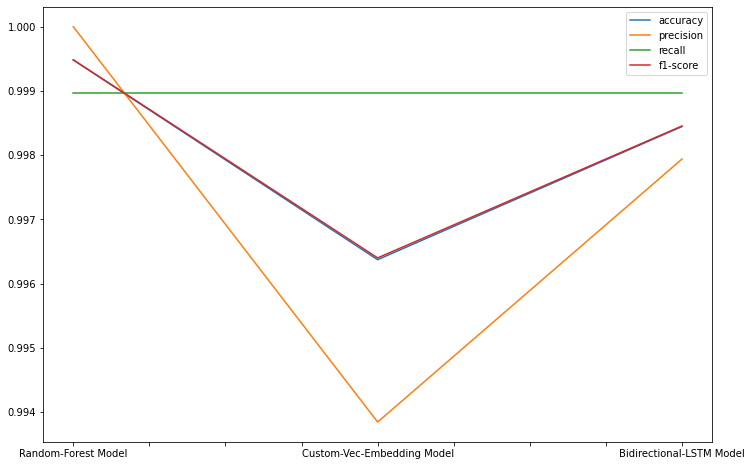

In [88]:
total_results.plot(figsize=(12, 8))


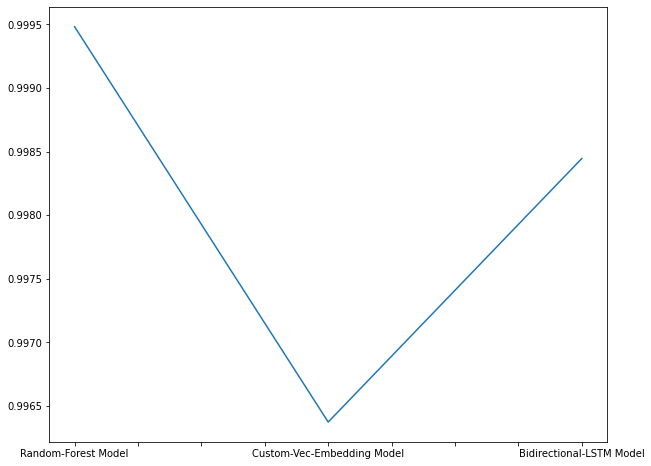

In [89]:
total_results['accuracy'].plot(figsize=(10, 8))


In [90]:
total_results.sort_values('accuracy', ascending=False)


,accuracy,precision,recall,f1-score
Random-Forest Model,0.999482,1.000000,0.998969,0.999484
Bidirectional-LSTM Model,0.998446,0.997940,0.998969,0.998454
Custom-Vec-Embedding Model,0.996373,0.993846,0.998969,0.996401
